In [134]:
import pandas as pd


# Part1: Data Loading and Cleaning up
The iris flower dataset consists of 150 collected observations for different flower's charachteristics. The dataset contains four attributes. These four attributes help decide which Iris class does the flower belong to. The four attributes are sepal length, sepal width, petal length, and petal width; all in cm. The data set contains 3 classes Iris Setosa, Iris Versicolour, and Iris Virginica. For more info about the dataset, you can chek [this link](https://en.wikipedia.org/wiki/Iris_flower_data_set). The end target of the project will be to build a model that can predict, based on the four attributes, which class does the flower belong to.

In the first part of the project we will start by loading the data and cleaning up any problems within the data. 

- load the Iris dataset using the file iris.data. You can open it with any text editor to find out how it looks like. Decide which separator you would like to use and if any rows needs to be skipped
<br>
Now let's do some exploring
- How many rows and colums are in the file
- How many nulls in the file
- Which rows contains nans and how many nans in each of these rows
- How many nans per columns?
- The 36th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" based on the original paper. Is that what you have? If not, fix it
- The 39th sample: 4.9,3.6,1.4,0.1,"Iris-setosa",  where the errors are in the second and third features. Fix it

In [135]:
import pandas as pd
import numpy as np

pd.options.mode.chained_assignment = None # To avoid warnings in output

#1
data = pd.read_csv('iris_not_clean.data', sep="|", names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'classes'], skiprows = [1,34])

#2
Rows , Columns = data.shape
print("Number of Rows : ",Rows)
print("Number of Columns : ",Columns)

#3
print("Number of nulls in the file : ",data.isnull().sum().sum())

#4
null_data = data[data.isnull().any(axis=1)]
print("Only rows that has Nans : \n",null_data)
null_data_each_row = null_data.isna().sum(axis=1)
print("Number of nans in each rows : \n",str(null_data_each_row))

#5
null_data_per_col = null_data.isna().sum(axis=0)
print("Number of nans per column : \n",str(null_data_per_col))

#6
print("Values of 36th row : \n",data.iloc[35])

sample_1 = data.iloc[35].to_numpy()
given_data_1 = [4.9, 3.1, 1.5, 0.2, 'Iris-setosa']

if sample_1.all() != given_data_1:
    data.iloc[35] = given_data_1

print("After updating the values of 36th row : \n",data.iloc[35])

#7
print("value of 39th row : \n",data.iloc[38])

given_data_2 = [4.9, 3.6, 1.4, 0.1, 'Iris-setosa']

data['sepal_width'].iloc[38] = given_data_2[1]
data['petal_length'].iloc[38] = given_data_2[2]

print("After updating the values of 39th row : \n",data.iloc[38])

Number of Rows :  153
Number of Columns :  5
Number of nulls in the file :  9
Only rows that has Nans : 
     sepal_length  sepal_width  petal_length  petal_width      classes
28           5.2          3.4           NaN          0.2  Iris-setosa
29           NaN          NaN           NaN          NaN          NaN
44           NaN          3.2           2.1          NaN          NaN
Number of nans in each rows : 
 28    1
29    5
44    3
dtype: int64
Number of nans per column : 
 sepal_length    2
sepal_width     1
petal_length    2
petal_width     2
classes         2
dtype: int64
Values of 36th row : 
 sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.1
classes         Iris-setosa
Name: 35, dtype: object
After updating the values of 36th row : 
 sepal_length            4.9
sepal_width             3.1
petal_length            1.5
petal_width             0.2
classes         Iris-setosa
Name: 35, dtype: object
value of 39th row :

# Part 2: Stastical Exploring
In this part we will understand a little more about the data and do some cool plottings
- What is the mean and variance for each column and use the function describe to get insights about the data
- Drop the nan rows
- Recaluclate the mean and variance for each column
- What is the correlation between the fourth column and each of the other three columns individually? Any observations
- How many records exist for each class. # Hint, you can do this in one line by using groupby
- Change the random seed to 1234 and randomly pick 20 samples of the data and display it
- Plot histogram for all the data attributes
- Plot histogram for all the data attributes per class, i.e. grouped by classes

Mean for each Column : 
 sepal_length    5.833775
sepal_width     3.060526
petal_length    3.746358
petal_width     1.192715
dtype: float64
Variance for each column : 
 sepal_length    0.694918
sepal_width     0.188365
petal_length    3.116903
petal_width     0.583747
dtype: float64
Data insights (describe) : 
        sepal_length  sepal_width  petal_length  petal_width
count    151.000000   152.000000    151.000000   151.000000
mean       5.833775     3.060526      3.746358     1.192715
std        0.833618     0.434011      1.765475     0.764033
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.300000     1.300000
75%        6.400000     3.325000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Mean for each Column after dropping Nans : 
 sepal_length    5.838000
sepal_width     3.057333
petal_length    3.757333
petal_width     1.199333
dt

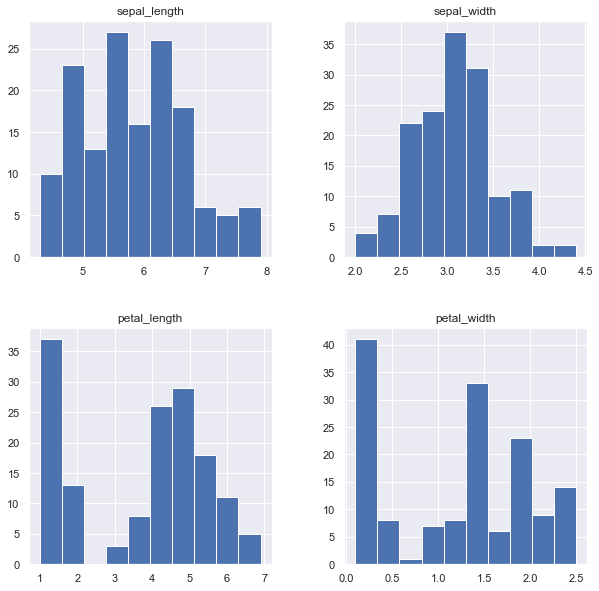

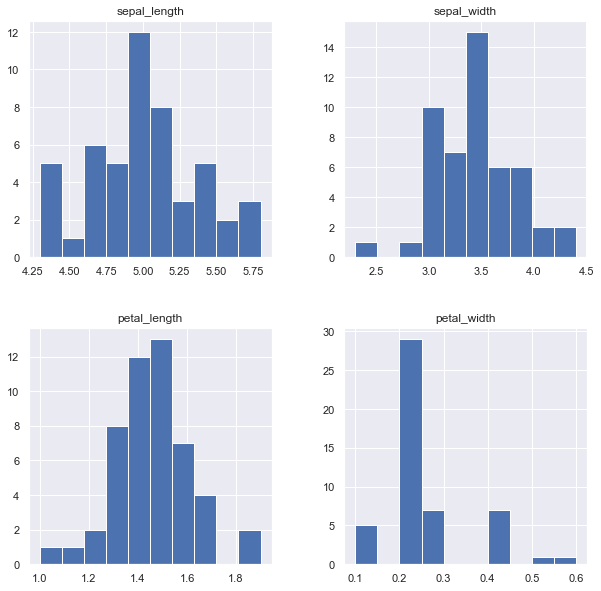

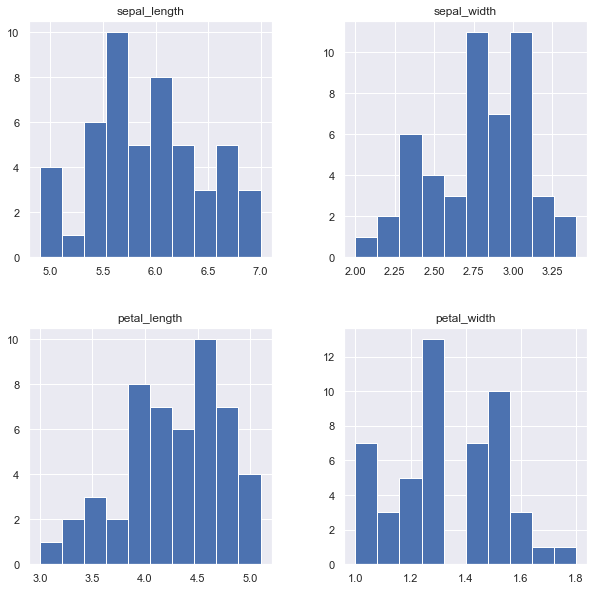

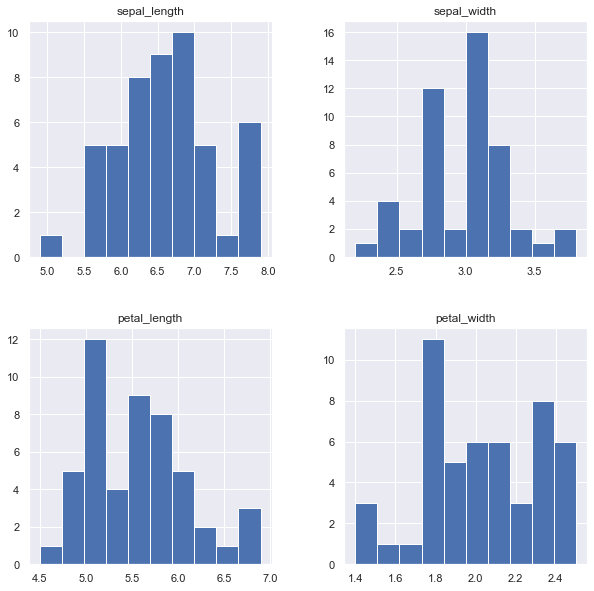

In [136]:
#1
#mean
print("Mean for each Column : \n",data.mean(numeric_only=True, skipna=True))

#variance
print("Variance for each column : \n",data.var(numeric_only=True, skipna=True))

#describe
print("Data insights (describe) : \n",data.describe())

#2 Drop Nans
cleaned_data = data.dropna()

#3
#Mean after drop Nans
print("Mean for each Column after dropping Nans : \n",cleaned_data.mean(numeric_only=True, skipna=True))

#Variance after drop Nans
print("Variance for each Column after dropping Nans : \n",cleaned_data.var(numeric_only=True, skipna=True))

#4
#correlation
col_1 = cleaned_data.sepal_length
col_2 = cleaned_data.sepal_width
col_3 = cleaned_data.petal_length
col_4 = cleaned_data.petal_width

correlation_1 = col_4.corr(col_1)
correlation_2 = col_4.corr(col_2)
correlation_3 = col_4.corr(col_3)

print("Correlation 4th column and 1st column",correlation_1)
print("Correlation 4th column and 2nd column",correlation_2)
print("Correlation 4th column and 3rd column",correlation_3)

#5
group_result = cleaned_data.groupby(['classes'])
print("Records exist for each class : \n",group_result.size())

#6
np.random.seed(1234)
random_samples = cleaned_data.sample(n = 20)
print("20 random samples : \n",random_samples)

#7
hist_1 = cleaned_data.hist(figsize=(10,10)) # This will show 1 Histogram.

#8
hist_2 = group_result.hist(figsize=(10,10)) # This will show 3 Histograms.

# Part 3: Statistical Analysis 
In this part, you will explore some curve fitting and dimensionality reductions attributes


- Use Scipy pdf fitting to do a curve fitting for the petal-length
- Plot the normalized histogrm of the petal-length and the estimated pdf on the same figure
- Generate new 500 samples using the estimated pdf for the petal-length 
- Calculate the mean of the new samples and compare how close it is to the mean of the given data

In [137]:
# Incomplete
# Currently Working on this.
# Will update this soon.

### PCA
- Use Scikit to do PCA on the IRIS dataset
- do a bar plot that shows the importance of info in each of the new dimensions
- use PCA to reduce the number of attributes by 1. Note that for all the next parts, you will use the reduced data

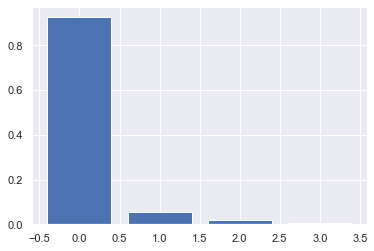

In [138]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#1
dropped_class = cleaned_data.drop(["classes"],axis=1)
pca = PCA()
transformed_data = pca.fit_transform(dropped_class)

#2
pca.explained_variance_ratio_
plt.bar(np.arange(4),pca.explained_variance_ratio_)

#3
pca = PCA(n_components=3)
reduced_data_pca = pca.fit_transform(dropped_class)
# print("Reduced Data",reduced_data_pca)

# Part 4: Machine Learning
In this part, you will explore the use of supervised and non supervised learning

### Non-Supervised Learning 
- using Kmeans, divide the data into different clusters. The number of clusters should be the same as the number of categories you have in the data
- Do scatter plot for each two combination of the three dimensions together (0 vs 1), (0 vs 2), (1 vs 2). Use the kmeans labels to color the points in the scatter plots

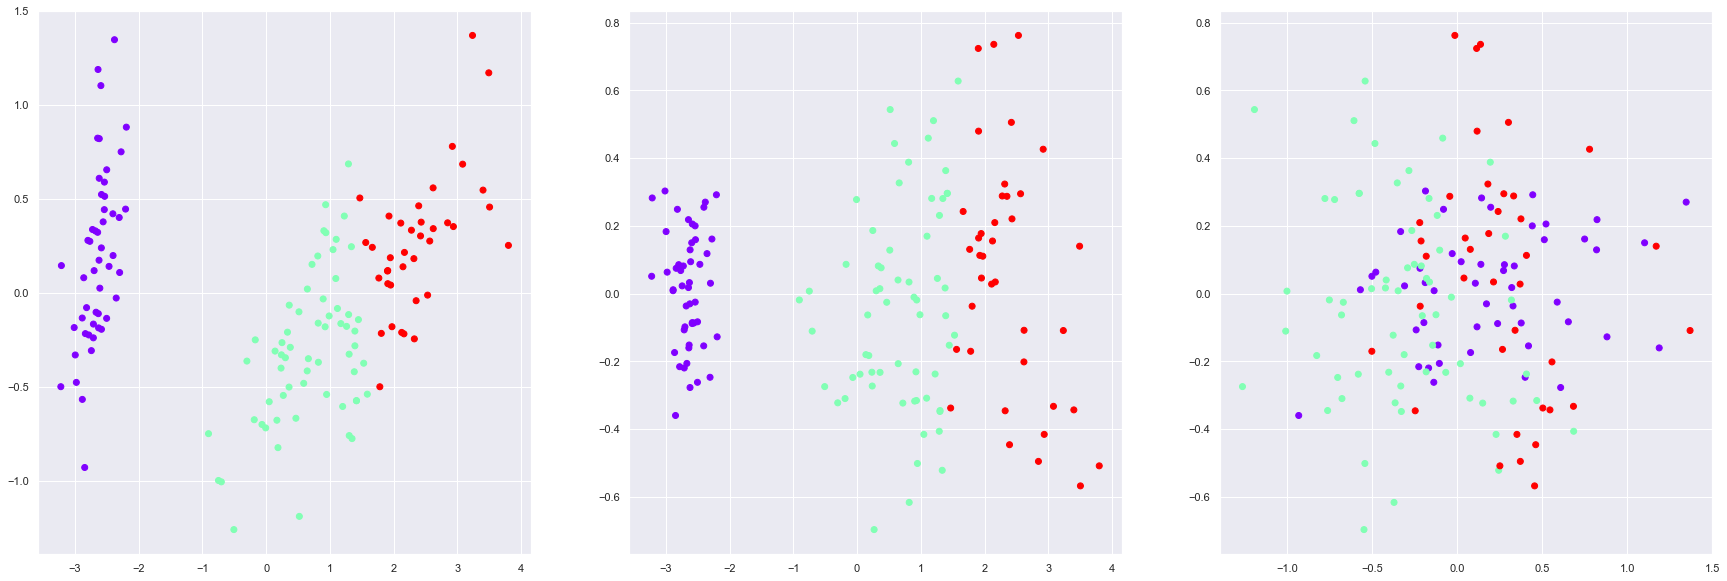

In [139]:
# Solve Here
from sklearn.cluster import KMeans

#1
row, col = reduced_data_pca.shape
kmeans = KMeans(n_clusters=col)  
kmeans.fit(reduced_data_pca)

#2
plt.figure(figsize=(30,10))
plt.subplot(131)
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.subplot(132)
plt.scatter(reduced_data_pca[:,0],reduced_data_pca[:,2], c=kmeans.labels_, cmap='rainbow')
plt.subplot(133)
plt.scatter(reduced_data_pca[:,1],reduced_data_pca[:,2], c=kmeans.labels_, cmap='rainbow')

### Supervised-Learning
- Divide your dataset to 80% training and 20% validation
- Build a Logistci regression model for the reduced IRIS dataset
- What is the training accuracy
- What is the validation accuracy
- Form the confusion matrix

The training accuracy of the Logistic Regression is 0.9916666666666667
The testing/validation accuracy of the Logistic Regression is 0.9333333333333333


Text(0.5, 12.5, 'Predicted label')

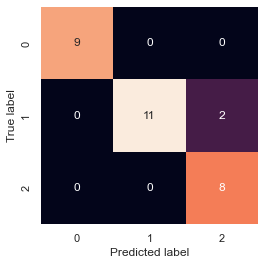

In [140]:
from sklearn.model_selection import train_test_split
#1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cleaned_data.classes = le.fit_transform(cleaned_data.classes)
x = cleaned_data.iloc[:, :-1].values
y = cleaned_data.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# print("80% train data :")
# print(x_train)
# print(y_train)

# print("20% test data :")
# print(x_test)
# print(y_test)

#2
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=0, solver='lbfgs',max_iter=1000, multi_class='multinomial').fit(x, y)
model.fit(x_train,y_train)
x_pred = model.predict(x_train)

#3
print('The training accuracy of the Logistic Regression is', metrics.accuracy_score(x_pred,y_train))

#4
y_pred = model.predict(x_test)
print('The testing/validation accuracy of the Logistic Regression is', metrics.accuracy_score(y_pred,y_test))

#5
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[0,1,2],
            yticklabels=[0,1,2])
plt.ylabel('True label')
plt.xlabel('Predicted label')